In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [355]:
#read csv file
df = pd.read_csv('bank-full.csv',sep=';')
df.shape

(45211, 17)

In [356]:
#print the first 5 rows of the dataframe
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [357]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [358]:
df.duration.sort_values()

22937       0
6424        0
36425       0
31740       1
44758       1
         ... 
2386     3366
19639    3422
44602    3785
9947     3881
24148    4918
Name: duration, Length: 45211, dtype: int64

In [359]:
# check for datatypes
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [360]:
#check for missing data if any
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [361]:
#replace categorical to binary 
df.y.replace(('yes','no'),(1,0),inplace=True)

In [362]:
#find columns with data types object
cat_col = [n for n in df.columns if df[n].dtypes == 'object']

In [363]:
#obtain the value count of each column holding a categorical data 
for col in cat_col:
    print(col)
    print(df[col].value_counts())

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
default
no     44396
yes      815
Name: default, dtype: int64
housing
yes    25130
no     20081
Name: housing, dtype: int64
loan
no     37967
yes     7244
Name: loan, dtype: int64
contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
poutcome
unknown    36959
failure     490

In [364]:
df.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

Percentage of subsription :  11.7 %
Percentage of no subscription :  88.3 %


Text(0, 0.5, 'Number of subscription')

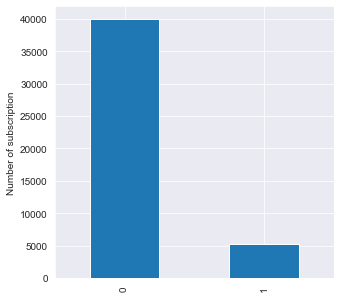

In [365]:
#Check the percentage of 0 to 1
No_sub = len(df[df['y'] == 0])
Sub = len(df[df['y'] == 1])
percent_No_sub = (No_sub/len(df['y'])) * 100
percent_sub = (Sub/len(df['y'])) * 100

print('Percentage of subsription : ',round(percent_sub,2),'%')
print('Percentage of no subscription : ', round(percent_No_sub,2),'%')


plt.figure(figsize=(5,5))
df['y'].value_counts().plot.bar();
plt.ylabel('Number of subscription')

<Figure size 576x576 with 0 Axes>

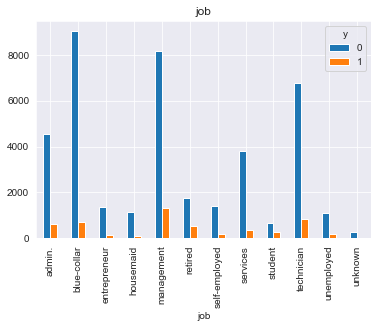

<Figure size 576x576 with 0 Axes>

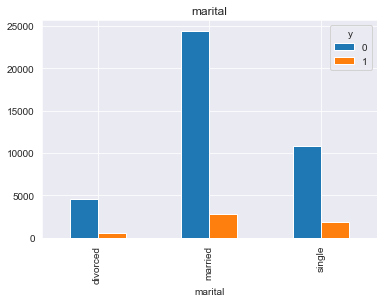

<Figure size 576x576 with 0 Axes>

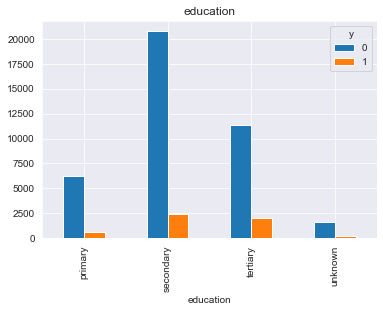

<Figure size 576x576 with 0 Axes>

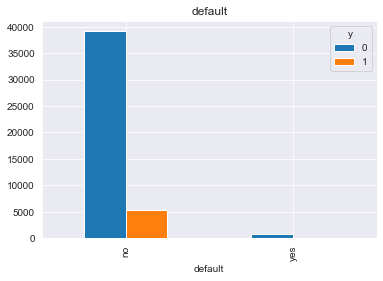

<Figure size 576x576 with 0 Axes>

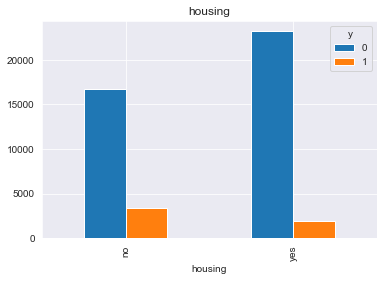

<Figure size 576x576 with 0 Axes>

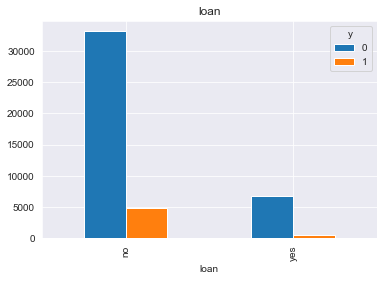

<Figure size 576x576 with 0 Axes>

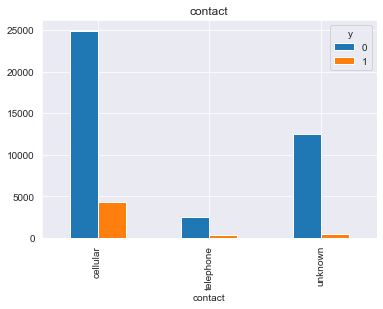

<Figure size 576x576 with 0 Axes>

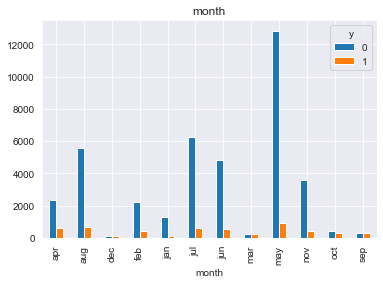

<Figure size 576x576 with 0 Axes>

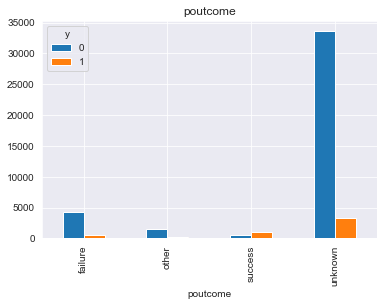

In [366]:
#Visualization from our categorical datas top see if we can get insigts from there
for col in cat_col:
    plt.figure(figsize=(8,8));
    pd.crosstab(df[col], df.y).plot(kind = 'bar');
    plt.title(col);
    plt.show();

Text(0, 0.5, 'Number of subscription')

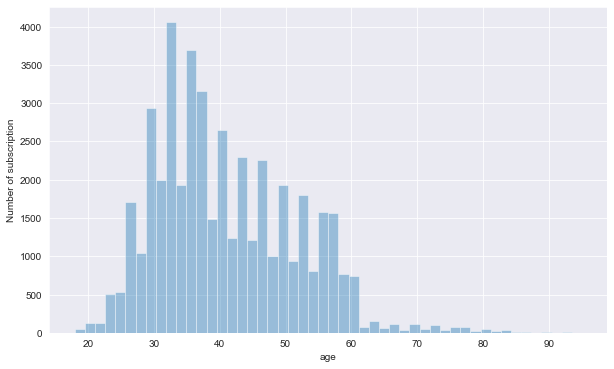

In [367]:
plt.figure(figsize = (10,6))
sns.distplot(a = df['age'], kde = False)
plt.ylabel("Number of subscription")

In [368]:
# # df.contact.replace(('cellular','telephone','unknown'),(0,1,np.NaN),inplace=True)
# contact = ({'cellular':0, 'telephone':1})
# df['contact'] = df['contact'].map(contact)

In [369]:
#Create dummy variable for the categorical data and drop first column to avoid dummy varibale trap
df = pd.get_dummies(df,columns = ['job','marital','education','default',
                                   'housing','loan','month','poutcome'], drop_first = True)

In [392]:
X = df.drop(columns=['y','contact'],axis=1)
y = df.y

In [393]:
X.shape

(45211, 40)

In [394]:
df.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

### Splitting the model

In [395]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3 , random_state = 0)

In [396]:
X_train.shape

(31647, 40)

### Model Selection

In [397]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

C:\Users\91976\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8919644832053591

In [398]:
clf.score(X_test,y_test)

0.8886021822471247

In [399]:
y_pred_clf = clf.predict(X_test)

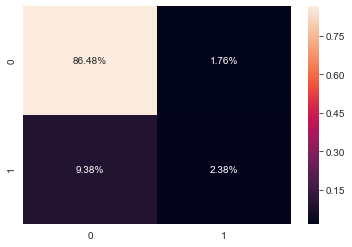

In [400]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_clf)
cm
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%')

In [401]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.57      0.20      0.30      1595

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.86      0.89      0.86     13564



In [402]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=None)
rf.fit(X_train, y_train)
rf.score(X_train,y_train)

0.9999684014282555

In [403]:
rf.score(X_test,y_test)

0.9029047478619876

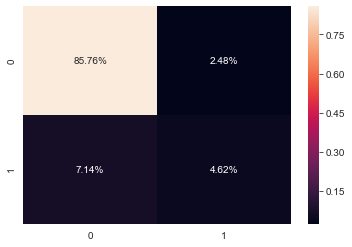

In [413]:
y_pred_rf = random_forest_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred_rf)
cm
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%')

In [414]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11969
           1       0.65      0.39      0.49      1595

    accuracy                           0.90     13564
   macro avg       0.79      0.68      0.72     13564
weighted avg       0.89      0.90      0.89     13564



### Prediction probabilities

In [415]:
r_probs = [0 for _ in range(len(y_test))]
clf_probs = clf.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)

In [416]:
clf_probs = clf_probs[:,1]
rf_probs = rf_probs[:,1]

### Print AUROC scores

In [417]:
from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(y_test,r_probs)
clf_auc = roc_auc_score(y_test,clf_probs)
rf_auc = roc_auc_score(y_test,rf_probs)

### Calculate ROC curve

In [418]:
r_fpr,r_tpr,_ = roc_curve(y_test,r_probs)
clf_fpr,clf_tpr,_ = roc_curve(y_test,clf_probs)
rf_fpr,rf_tpr,_ = roc_curve(y_test,rf_probs)

### Plot the ROC curve

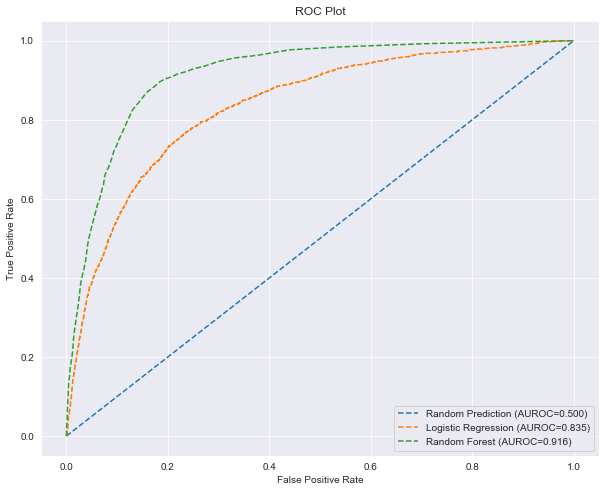

In [419]:
plt.figure(figsize=(10,8))
plt.plot(r_fpr,r_tpr,linestyle= '--',label = "Random Prediction (AUROC=%0.3f)" %r_auc)
plt.plot(clf_fpr,clf_tpr,linestyle= '--',label = "Logistic Regression (AUROC=%0.3f)" % clf_auc)
plt.plot(rf_fpr,rf_tpr,linestyle= '--',label = "Random Forest (AUROC=%0.3f)" % rf_auc)
plt.title('ROC Plot')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [420]:
for name, importance in zip(df.columns, rf.feature_importances_):
    print(name, "=", importance)

age = 0.10032122247997395
balance = 0.10385487062825886
contact = 0.09059376099316149
day = 0.28080105823045887
duration = 0.04040322906206742
campaign = 0.040472819278750426
pdays = 0.023034819530877874
previous = 0.009009609168215997
y = 0.0038365690294371946
job_blue-collar = 0.0034436012551276166
job_entrepreneur = 0.010641802772561883
job_housemaid = 0.005005100668040402
job_management = 0.004971269572729978
job_retired = 0.006725114608256662
job_self-employed = 0.004787503630213582
job_services = 0.011171983131495367
job_student = 0.0049993402462018815
job_technician = 0.001487724538670862
job_unemployed = 0.01185516164740907
job_unknown = 0.009577968488690941
marital_married = 0.01308660337282099
marital_single = 0.011835377803380042
education_secondary = 0.005460709025140565
education_tertiary = 0.0020718457793390383
education_unknown = 0.021518178192722143
default_yes = 0.009571893852072043
housing_yes = 0.010262190270554099
loan_yes = 0.004482331572376601
month_aug = 0.008182

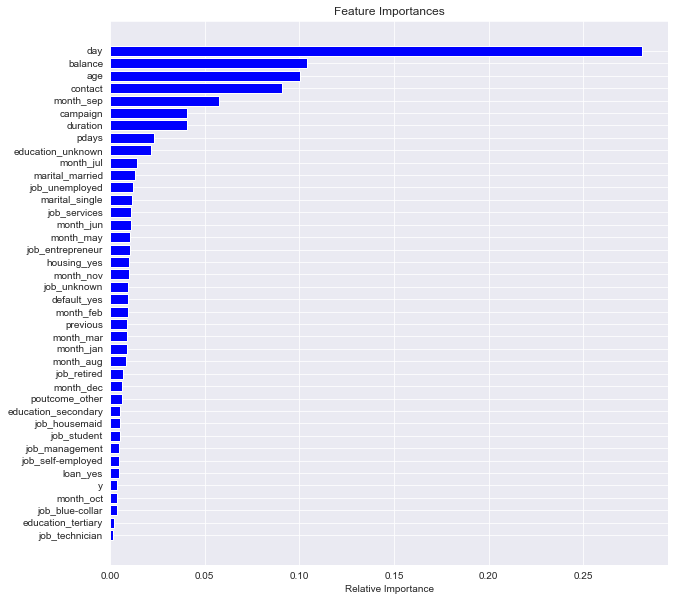

In [421]:
features = df.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()